# Random Forest Classification Project

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. The data set has already been cleaned of NA values.

Here are what the columns represent:

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Data Gathering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Data Exploring

Histogram of two FICO distributions on top of each other, one for each credit.policy outcome

Text(0.5, 0, 'FICO')

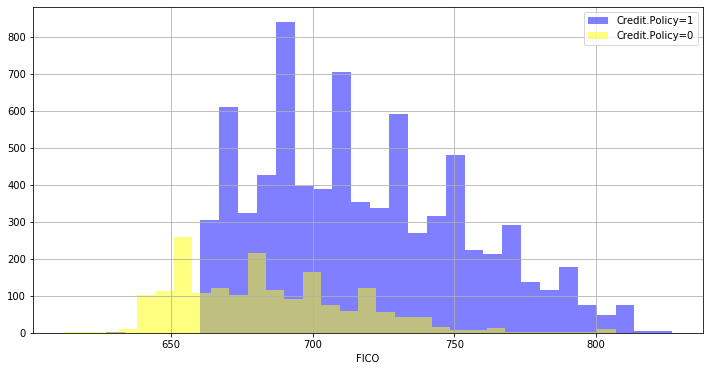

In [16]:
#loans['fico'].plot.hist(bins=30)
plt.figure(figsize=(12,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='yellow',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

We can see here that people with higher fico are generaly accepted by thecredit policy. 

Text(0.5, 0, 'FICO')

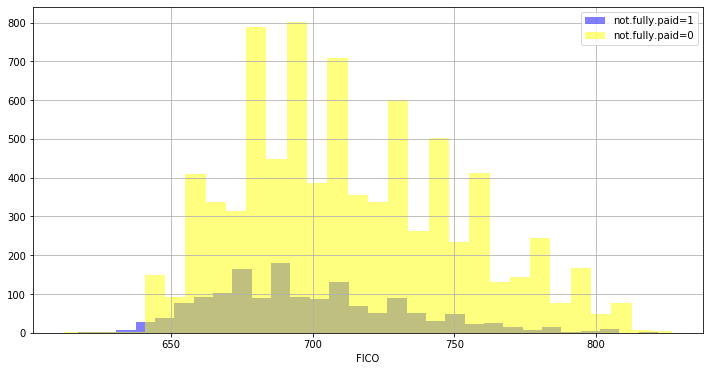

In [15]:
#repeat the same plot, with not.fully.paid label as splitting cirteria 
plt.figure(figsize=(12,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='yellow',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

We can not see strong correlation between fico score and whither or not a person has fully paid his/her loan. 

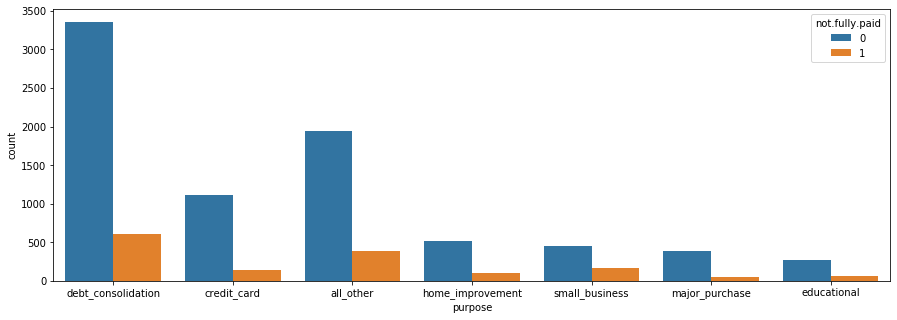

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data= loans, x= 'purpose', hue='not.fully.paid')

In the figure above, we can see the count of loans (fully paid or not) for each borrowing purpose. The main purposes of loans are debt consolidation, credit card, and others. 

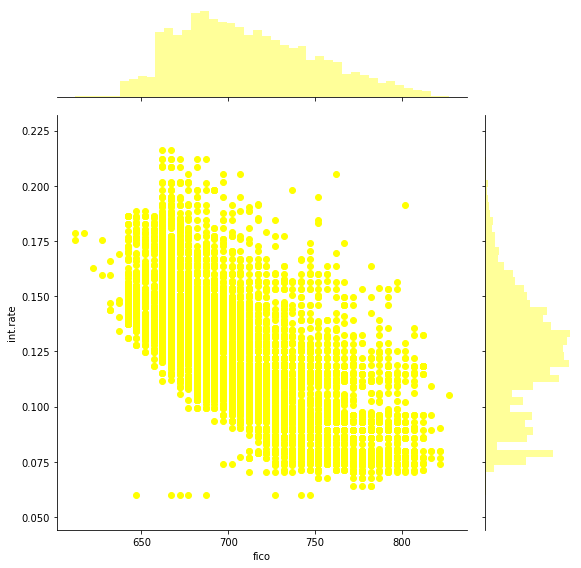

In [21]:
sns.jointplot(data= loans, x= 'fico', y='int.rate', color='yellow', height=8, ratio=4)

Above we can see the relationship between fico score and interest rate. No strong correlation can be observed, yet interest rate tend to decrease as fico score gets higher. 

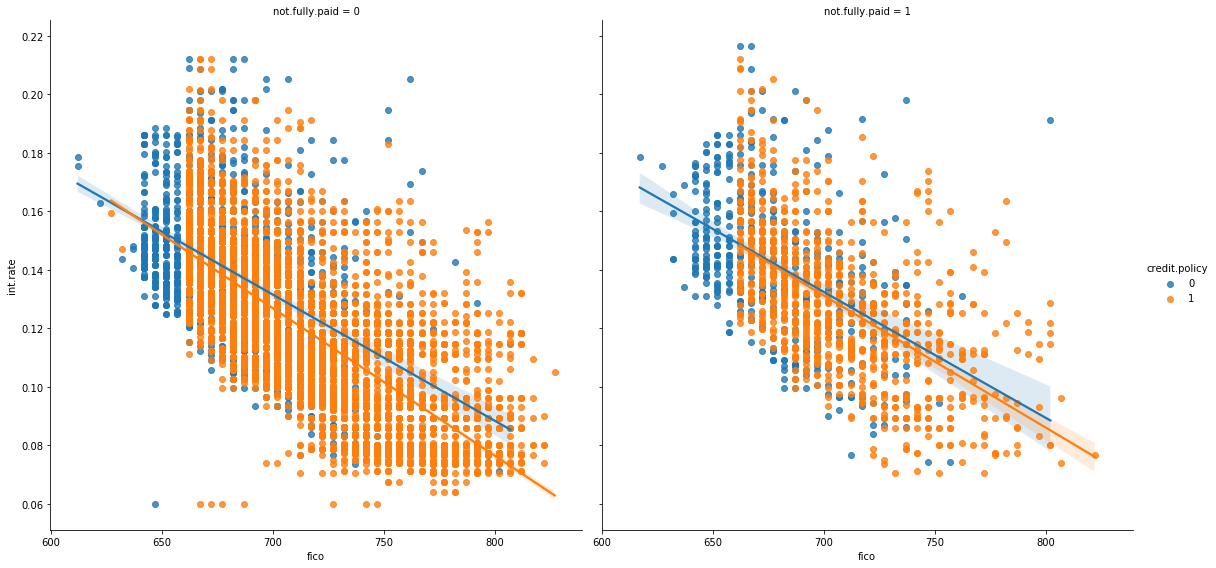

In [23]:
sns.lmplot(data=loans, x="fico", y="int.rate", hue="credit.policy", col="not.fully.paid", height=8, aspect=1)

The figure above shows the trend differences between not.fully.paid and credit.policy.

## Categorical Features

In [24]:
cat_feats = ['purpose']

In [25]:
final_data =  pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [26]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In the original data set, we had 'purpose' as a catagorical feature, for which each data point has a string value; here we transformed this feature into a number of binary features, containing the same information, but more suitable for our classifier to train with. 

## Data set split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Model Training

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Decision Tree Predictions and Evaluation

In [32]:
dtree_pred = dtree.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print('Classification Report')
print('---------------------\n')
print(classification_report(y_test, dtree_pred))
print('\n')
print('Confusion Matrix')
print('----------------\n')
print(confusion_matrix(y_test, dtree_pred))

Classification Report
---------------------

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.19      0.20      0.19       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874



Confusion Matrix
----------------

[[2022  386]
 [ 375   91]]


Here we can see that the accuracy of our classification is not that great, mainly because our data is not balanced, where most data points belong to 'not.fully.paid = 0' class. We will try to improve our classification by using random forest rechnique. 

## Random Forest Model Training

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Random Forest Predictions and Evaluation

In [37]:
rfc_pred= rfc.predict(X_test)

In [38]:
print('Classification Report')
print('---------------------\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print('Confusion Matrix')
print('----------------\n')
print(confusion_matrix(y_test, rfc_pred))

Classification Report
---------------------

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.26      0.01      0.02       466

    accuracy                           0.83      2874
   macro avg       0.55      0.50      0.47      2874
weighted avg       0.74      0.83      0.77      2874



Confusion Matrix
----------------

[[2391   17]
 [ 460    6]]


Here we can see that random forest performed better than a single decision tree when it comes to 'not.fully.paid = 0' class; on the other hand, it actually performed wort for the other class. These final results can be improved by using data cleaning techniques to solve the unbalance in our data. 